In [1]:
#Wissahickon Mean Elevation Profile

# these lines tell python which `packages' of commands we want to use
import numpy as np # for math
import pandas as pd # to load the spreadsheet
from matplotlib import pyplot as plt # for plotting

In [4]:
# this line imports the data from the spreadsheet and saves it as an array
qgisdata = np.asarray(pd.read_csv('Data/qgis-profiles.csv',header=1))

# convert the data from meters to ft
qgisdata = qgisdata*0.3048

# these lines save every other column starting from the 0th column as the horizontal distace (dvals) and every other column starting from the 1st column as elevation (zvals), for the raw data in qgisdata
zvals = qgisdata[:,1::2]
dvals = qgisdata[:,::2]

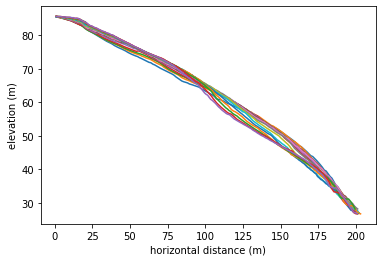

In [5]:
# this line plots the raw profiles
plt.plot(dvals,zvals)

# this gives the plot labels and displays it
plt.xlabel('horizontal distance (m)')
plt.ylabel('elevation (m)')
plt.show()

In [6]:
# lets make bins in elevation at every meter
zbinwidth = 1
# this line defines the elevations we want for bin edges
# it goes from the lowest elevation to the highest at intervals of zbinwidth
# we use nanmin and nanmax instead of min and max because the profiles have different lengths, so when we imported the data from the spreadsheet into the array, the empty cells get defined as NaNs (Not A Number)
zbins = np.arange(np.nanmin(qgisdata[:,1::2]),np.nanmax(qgisdata[:,1::2]),zbinwidth)
# bin midpoints (for plotting) need to be defined as the right edge of the bins minus half the binwidth
zbinmids = zbins[1:] - zbinwidth/2

In [7]:
# lets get the mean and standard deviation for each bin

# first define the arrays that will store the mean and std distances for each elevation bin
dmean = np.empty_like(zbinmids)
dstd  = np.empty_like(zbinmids)

for i in range(len(zbinmids)): # loop through each zbin
    # saving each calculation to the appropriate index in each empty array...
    dmean[i] = np.nanmean(dvals[(zvals>zbins[i])&(zvals<=zbins[i+1])]) # here we get the mean (omitting NaNs) of all the dvals where zval is greater than the lower value of zbin and less than or equal to the upper value of zbin, for this index i
    dstd[i]  = np.nanstd(dvals[(zvals>zbins[i])&(zvals<=zbins[i+1])]) # same as above but for standard deviation this time

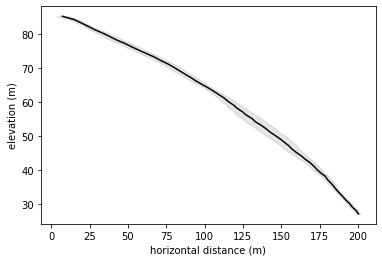

In [8]:
# the line plots the mean profile
plt.plot(dmean,zbinmids,c='k')
# this line plots a shaded region 1 standard deviation on either side of the mean
plt.fill_betweenx(zbinmids,dmean-dstd,dmean+dstd,color='k',alpha=0.1)

# this gives the plot labels and displays it
plt.xlabel('horizontal distance (m)')
plt.ylabel('elevation (m)')
plt.show()